Index(['country', 'code', 'year', 'protein_per_capita_(g)'], dtype='object')


/tmp/ipykernel_20410/2879343598.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


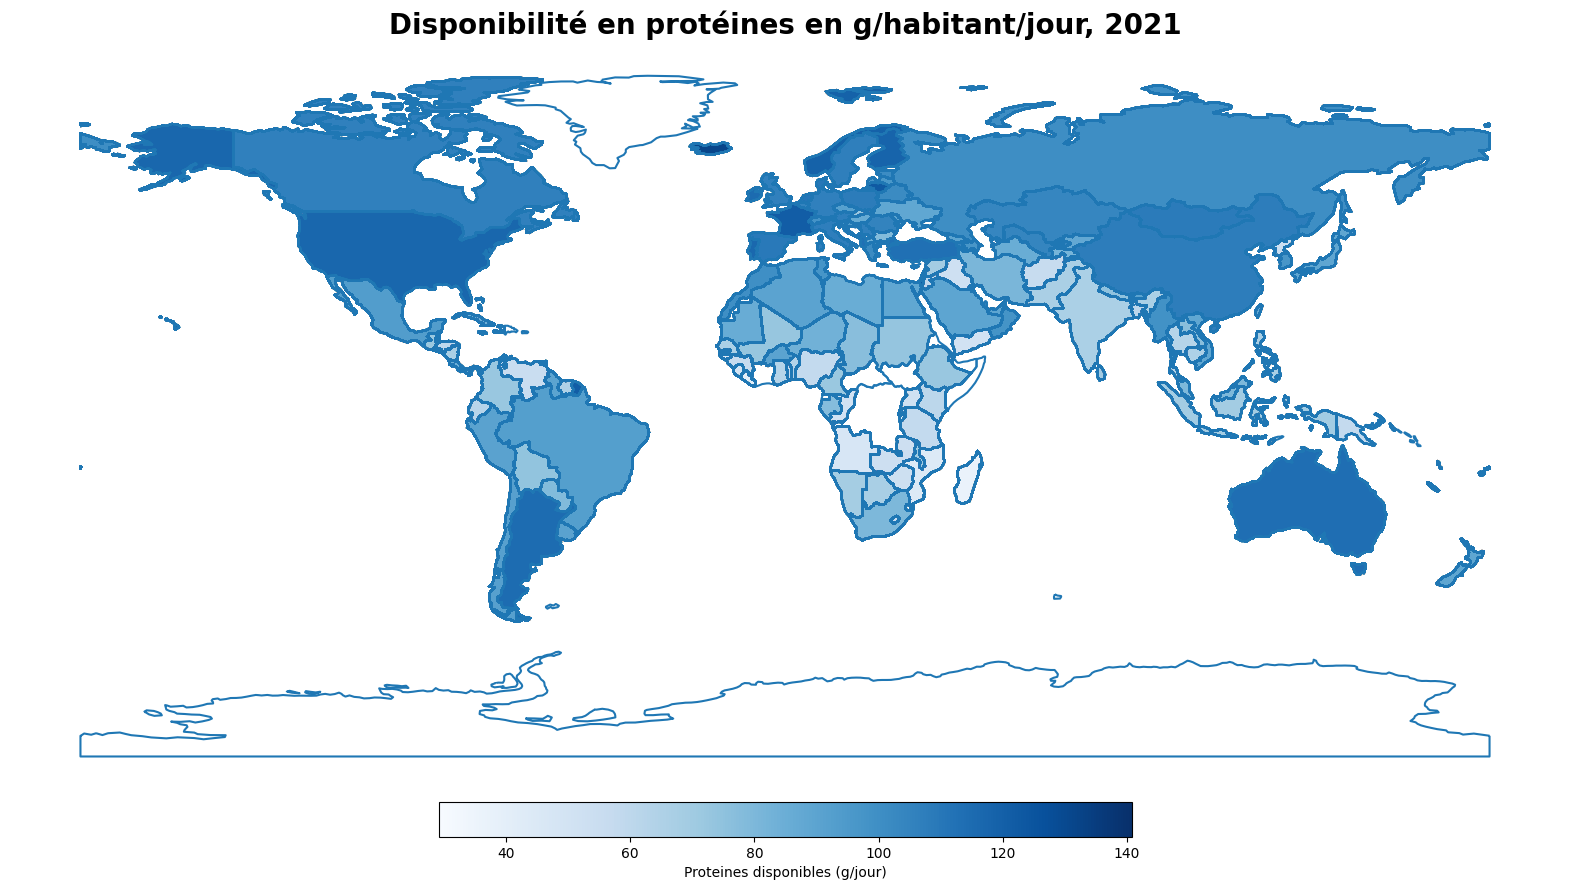

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df_world_prot = pd.read_csv("daily-per-capita-protein-supply.csv")


df_world_prot = df_world_prot.rename(columns={'Total': 'protein_per_capita_(g)', 'Code': 'code', 'Year': 'year'})
df_world_prot = df_world_prot.rename(columns={
    'Total | 00002901 || Food available for consumption | 0674pc || grams of protein per day per capita': 'protein_per_capita_(g)',
    'Entity': 'country'})

print(df_world_prot.columns)
# Téléchargez la carte du monde en utilisant geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Fusionnez le DataFrame avec les données sur la carte du monde
world = world.merge(df_world_prot, how='left', left_on='name', right_on='country')

# Créez la heatmap du monde
fig, ax = plt.subplots(1, 1, figsize=(20,15 ))
world.boundary.plot(ax=ax)
world.plot(column='protein_per_capita_(g)', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Proteines disponibles (g/jour)", 'orientation': "horizontal", 'shrink': 0.8, 'pad': 0.01, 'fraction': 0.03})

# Ajoutez une légende
ax.set_title('Disponibilité en protéines en g/habitant/jour, 2021', fontsize=20, fontweight='bold')
ax.set_axis_off()

plt.show()



In [51]:
# Charger le GeoDataFrame représentant les frontières du monde
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Extraire la liste des noms des pays
list_of_countries = world['name'].unique()

# Afficher la liste des noms des pays
print(list_of_countries)


['Fiji' 'Tanzania' 'W. Sahara' 'Canada' 'United States of America'
 'Kazakhstan' 'Uzbekistan' 'Papua New Guinea' 'Indonesia' 'Argentina'
 'Chile' 'Dem. Rep. Congo' 'Somalia' 'Kenya' 'Sudan' 'Chad' 'Haiti'
 'Dominican Rep.' 'Russia' 'Bahamas' 'Falkland Is.' 'Norway' 'Greenland'
 'Fr. S. Antarctic Lands' 'Timor-Leste' 'South Africa' 'Lesotho' 'Mexico'
 'Uruguay' 'Brazil' 'Bolivia' 'Peru' 'Colombia' 'Panama' 'Costa Rica'
 'Nicaragua' 'Honduras' 'El Salvador' 'Guatemala' 'Belize' 'Venezuela'
 'Guyana' 'Suriname' 'France' 'Ecuador' 'Puerto Rico' 'Jamaica' 'Cuba'
 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Mali' 'Mauritania' 'Benin'
 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana' "Côte d'Ivoire" 'Guinea'
 'Guinea-Bissau' 'Liberia' 'Sierra Leone' 'Burkina Faso'
 'Central African Rep.' 'Congo' 'Gabon' 'Eq. Guinea' 'Zambia' 'Malawi'
 'Mozambique' 'eSwatini' 'Angola' 'Burundi' 'Israel' 'Lebanon'
 'Madagascar' 'Palestine' 'Gambia' 'Tunisia' 'Algeria' 'Jordan'
 'United Arab Emirates' 'Qatar' 'Kuwait'

/tmp/ipykernel_20410/2651290576.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


3.Diversité des sources de protéines :

Analysez la variété des sources de protéines disponibles dans chaque région, y compris les produits d'origine animale et végétale.
Identifiez les régions où la diversité des sources de protéines est limitée et discutez des avantages d'une alimentation diversifiée en protéines.

4.Durabilité de la production de protéines :

Explorez l'impact environnemental de la production de protéines, en mettant en évidence les pratiques agricoles et les sources de protéines associées à une empreinte écologique plus faible.
Discutez des défis et des opportunités pour une production de protéines plus durable.

In [105]:
df_prot_world = pd.read_csv("prot_pays2021.csv")
df_prot_world.columns

columns_to_drop = ['Domain Code', 'Domain', 'Area Code (M49)','Element Code',
       'Element', 'Item Code (FBS)', 'Year Code', 'Flag', 'Flag Description']
df_prot_world = df_prot_world.drop(columns=columns_to_drop)
df_prot_world

,Area,Item,Year,Unit,Value
0,Central African Republic,Wheat and products,2021,g/cap/d,0.82
1,Central African Republic,Rice and products,2021,g/cap/d,0.87
2,Central African Republic,Maize and products,2021,g/cap/d,3.86
3,Central African Republic,Millet and products,2021,g/cap/d,0.38
4,Central African Republic,Sorghum and products,2021,g/cap/d,1.15
5,Central African Republic,Cassava and products,2021,g/cap/d,2.26
6,Central African Republic,Peas,2021,g/cap/d,0.22
7,Central African Republic,Groundnuts,2021,g/cap/d,3.15
8,Central African Republic,Bovine Meat,2021,g/cap/d,7.91
9,Central African Republic,Mutton & Goat Meat,2021,g/cap/d,2.40


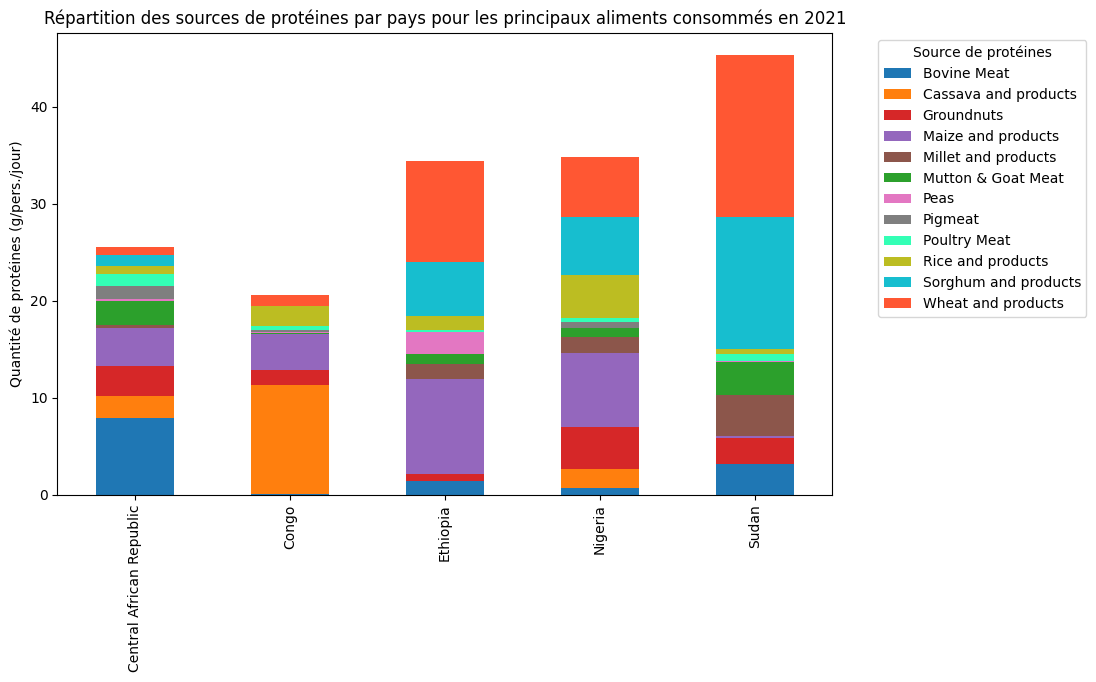

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que df soit votre DataFrame
# Remplacez 'df' par le nom réel de votre DataFrame si différent

# Filtrer uniquement les colonnes nécessaires
df_prot_world_filtered = df_prot_world[['Area', 'Item', 'Value']]

# Pivoter le DataFrame pour avoir les protéines comme colonnes
df_pivot = df_prot_world_filtered.pivot(index='Area', columns='Item', values='Value').reset_index()

# Remplacer les valeurs NaN par 0
df_pivot = df_pivot.fillna(0)

custom_palette = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#8c564b', '#2ca02c', '#e377c2', '#7f7f7f','#33FFB5', '#bcbd22', '#17becf', '#ff5733']
#custom_palette = plt.cm.get_cmap("tab20", 15)

# Tracer le graphique à barres empilées
ax = df_pivot.plot(kind='bar', stacked=True, x='Area', figsize=(10, 6), color=custom_palette)
plt.title('Répartition des sources de protéines par pays pour les principaux aliments consommés en 2021')
plt.xlabel('')
plt.ylabel('Quantité de protéines (g/pers./jour)')
plt.legend(title='Source de protéines', bbox_to_anchor=(1.05, 1), loc='upper left')

# Afficher le graphique
plt.show()

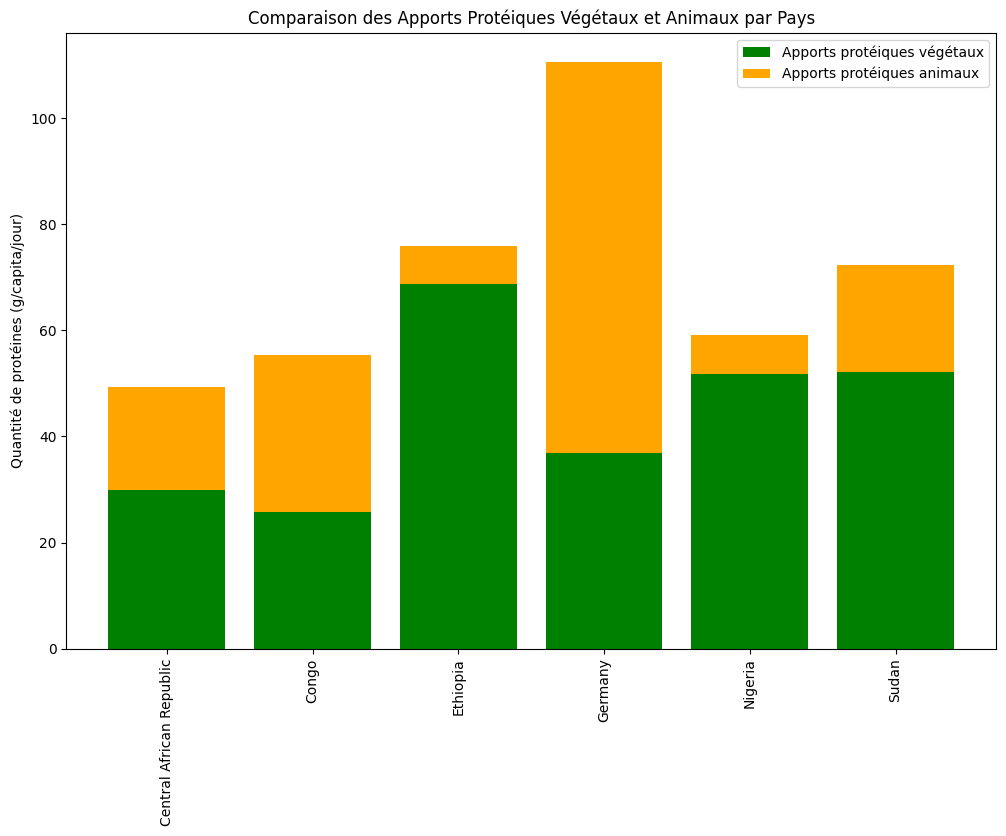

In [54]:
#autre analyse apports protéiques vgtal et animal cumulés pour chaque pays

df_anivgt = pd.read_csv("vg_an_5pays.csv")
df_anivgt.head(4)

import matplotlib.pyplot as plt
import pandas as pd

# Supposons que votre DataFrame s'appelle df
# Assurez-vous d'avoir une colonne "Area", "Item", et "Value" dans votre DataFrame

# Filtrer les lignes pertinentes
df_vegetal = df_anivgt[df_anivgt['Item'] == 'Vegetal Products']
df_animal = df_anivgt[df_anivgt['Item'] == 'Animal Products']

# Fusionner les deux DataFrames
df_combined = pd.merge(df_vegetal, df_animal, on=['Area', 'Year'], suffixes=('_Vegetal', '_Animal'))

# Créer le graphique en barres cumulées
plt.figure(figsize=(12, 8))
plt.bar(df_combined['Area'], df_combined['Value_Vegetal'], label='Apports protéiques végétaux', color='green')
plt.bar(df_combined['Area'], df_combined['Value_Animal'], bottom=df_combined['Value_Vegetal'], label='Apports protéiques animaux', color='orange')

# Ajouter des labels et un titre
plt.xlabel('')
plt.ylabel('Quantité de protéines (g/capita/jour)')
plt.title('Comparaison des Apports Protéiques Végétaux et Animaux par Pays')
plt.legend()

# Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=90)

plt.show()


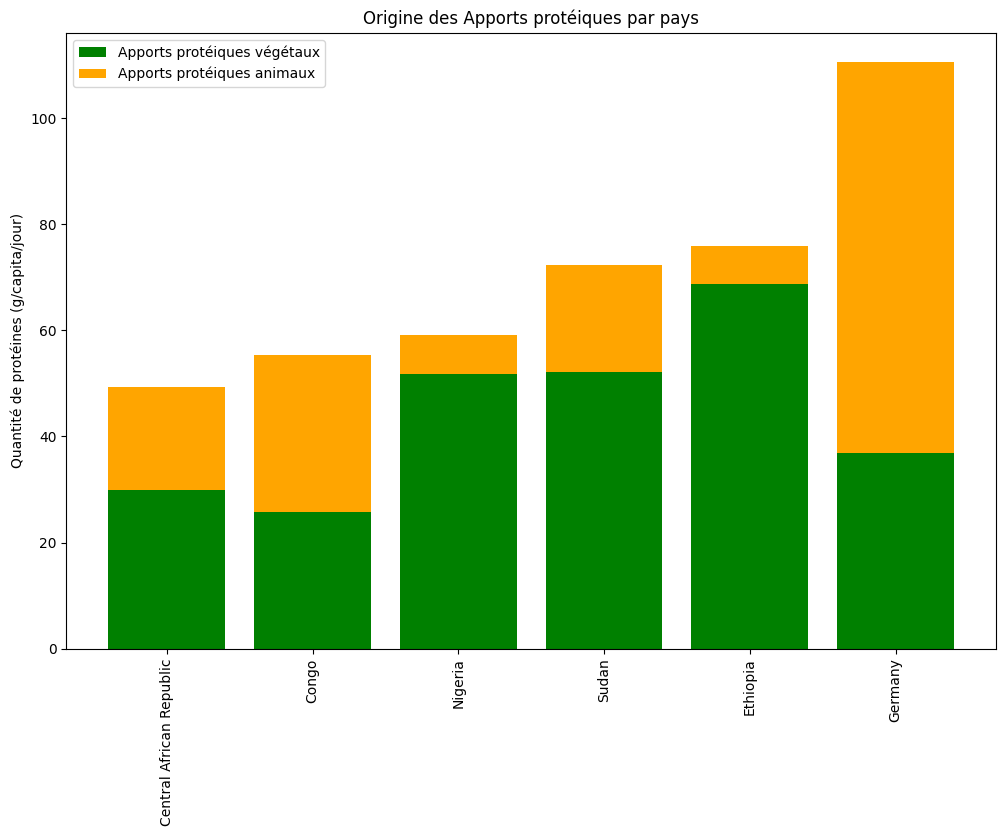

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Supposons que votre DataFrame s'appelle df
# Assurez-vous d'avoir une colonne "Area", "Item", et "Value" dans votre DataFrame

# Filtrer les lignes pertinentes
df_vegetal = df_anivgt[df_anivgt['Item'] == 'Vegetal Products']
df_animal = df_anivgt[df_anivgt['Item'] == 'Animal Products']

# Fusionner les deux DataFrames
df_combined = pd.merge(df_vegetal, df_animal, on=['Area', 'Year'], suffixes=('_Vegetal', '_Animal'))

# Calculer la somme des valeurs pour chaque pays
df_combined['Total'] = df_combined['Value_Vegetal'] + df_combined['Value_Animal']

# Trier le DataFrame par la somme des valeurs
df_combined = df_combined.sort_values(by='Total', ascending=True)

# Créer le graphique en barres cumulées
plt.figure(figsize=(12, 8))
plt.bar(df_combined['Area'], df_combined['Value_Vegetal'], label='Apports protéiques végétaux', color='green')
plt.bar(df_combined['Area'], df_combined['Value_Animal'], bottom=df_combined['Value_Vegetal'], label='Apports protéiques animaux', color='orange')

# Ajouter des labels et un titre
plt.xlabel('')
plt.ylabel('Quantité de protéines (g/capita/jour)')
plt.title('Origine des Apports protéiques par pays')
plt.legend()

# Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=90)

plt.show()


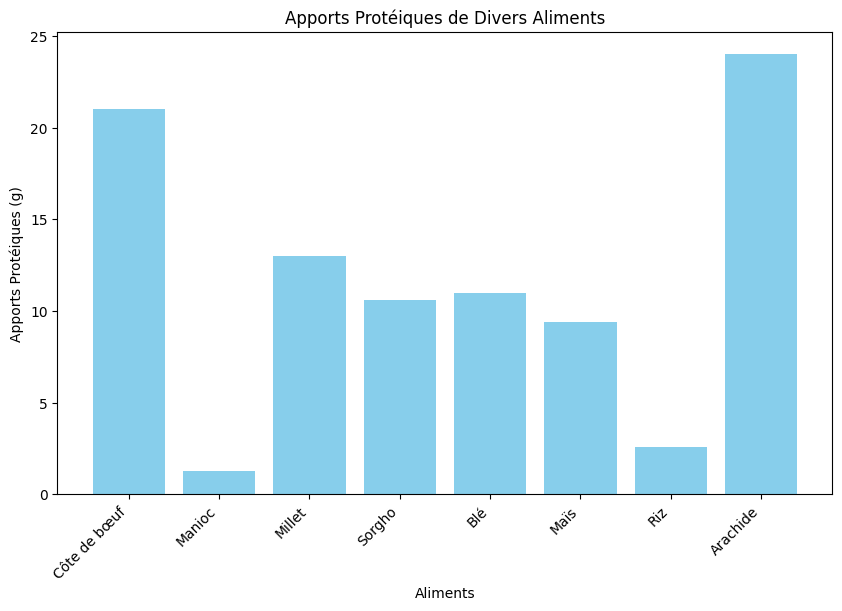

In [56]:
import matplotlib.pyplot as plt

aliments = ['Côte de bœuf', 'Manioc', 'Millet', 'Sorgho', 'Blé', 'Maïs', 'Riz', 'Arachide']
apports_protéiques = [21, 1.3, 13, 10.6, 11, 9.4, 2.6, 24]

plt.figure(figsize=(10, 6))
plt.bar(aliments, apports_protéiques, color='skyblue')
plt.xlabel('Aliments')
plt.ylabel('Apports Protéiques (g)')
plt.title('Apports Protéiques de Divers Aliments')
plt.xticks(rotation=45, ha='right')
plt.show()

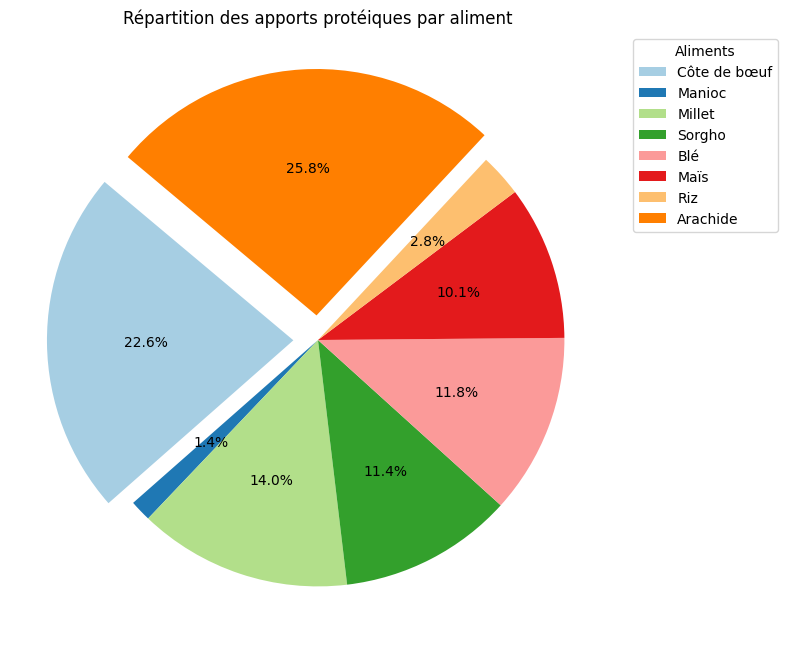

In [58]:
import matplotlib.pyplot as plt

aliments = ['Côte de bœuf', 'Manioc', 'Millet', 'Sorgho', 'Blé', 'Maïs', 'Riz', 'Arachide']
apports_protéiques = [21, 1.3, 13, 10.6, 11, 9.4, 2.6, 24]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0.1)  # Mettez en évidence la Côte de bœuf et l'Arachide

plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(apports_protéiques, autopct='%1.1f%%', startangle=140, explode=explode, colors=plt.cm.Paired.colors)
plt.title('Répartition des apports protéiques par aliment')

# Ajoutez une légende avec les noms des aliments
plt.legend(patches, aliments, title='Aliments', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [96]:
df_emis_veg = pd.read_csv("emissions_culture.csv")
df_emis_veg.head(4)
df_emis_veg['Item'].unique()


array(['Maize (corn)', 'Millet', 'Rice', 'Sorghum', 'Wheat'], dtype=object)

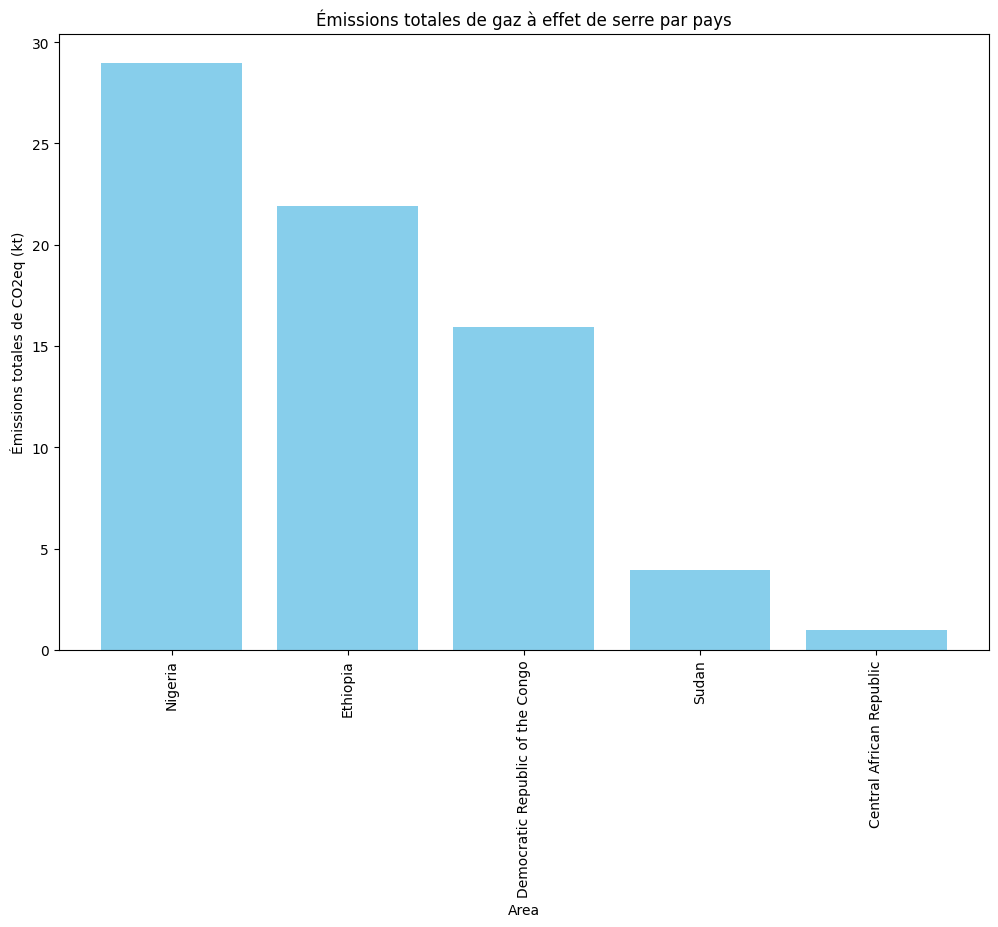

NameError: name 'df_emis_vg' is not defined

In [91]:
import matplotlib.pyplot as plt
import pandas as pd

# Supposons que votre DataFrame s'appelle df
# Assurez-vous d'avoir une colonne "Country" et une colonne "Value" dans votre DataFrame

'''['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year',
       'Source Code', 'Source', 'Unit', 'Value', 'Flag', 'Flag Description',
       'Note'],'''
# Exemple pour lire les données (à adapter selon votre structure de données)
# df = pd.read_csv("votre_fichier.csv")

# Filtrer les lignes pertinentes (Emissions totales de tous les produits)
df_total_emissions = df_emis_veg[df_emis_veg['Item'].isin(['Maize (corn)', 'Millet', 'Rice', 'Sorghum', 'Wheat'])]
df_total_emissions



# Grouper par pays et sommer les émissions
df_total_emissions_by_country = df_total_emissions.groupby('Area')['Value'].sum().reset_index()

# Trier le DataFrame par valeur décroissante
df_total_emissions_by_country = df_total_emissions_by_country.sort_values(by='Value', ascending=False)

# Créer le diagramme
plt.figure(figsize=(12, 8))
plt.bar(df_total_emissions_by_country['Area'], df_total_emissions_by_country['Value'], color='skyblue')
plt.xlabel('Area')
plt.ylabel('Émissions totales de CO2eq (kt)')
plt.title('Émissions totales de gaz à effet de serre par pays')
plt.xticks(rotation=90)
plt.show()

df_emis_vg.columns


<Figure size 1200x800 with 0 Axes>

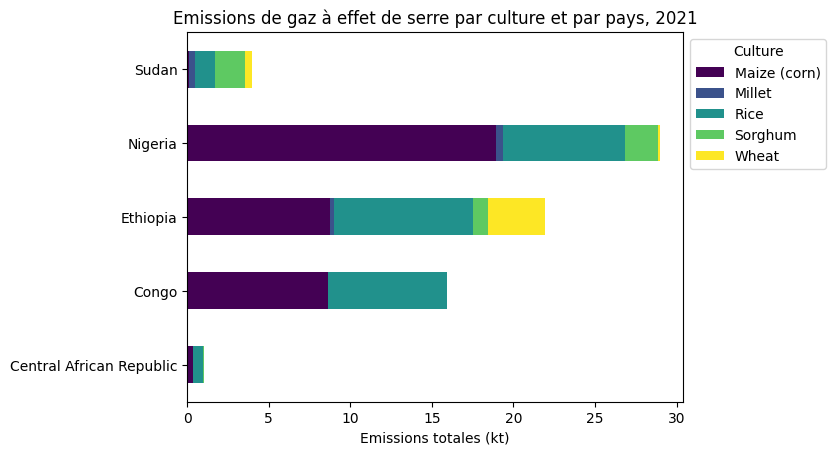

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named df_emis_veg
# Filter relevant crop types
selected_crops = ['Maize (corn)', 'Millet', 'Rice', 'Sorghum', 'Wheat']
df_total_emissions = df_emis_veg[df_emis_veg['Item'].isin(selected_crops)]

# Group by both country and crop type, then sum the emissions
df_total_emissions_by_country_crop = df_total_emissions.groupby(['Area', 'Item'])['Value'].sum().reset_index()

# Pivot the DataFrame to have crop types as columns
df_pivot = df_total_emissions_by_country_crop.pivot(index='Area', columns='Item', values='Value').fillna(0)

# Create the stacked horizontal bar chart
plt.figure(figsize=(12, 8))
df_pivot.plot(kind='barh', stacked=True, colormap='viridis')
plt.xlabel('Emissions totales (kt)')
plt.ylabel('')
plt.title('Emissions de gaz à effet de serre par culture et par pays, 2021')
plt.legend(title='Culture', bbox_to_anchor=(1, 1))
plt.show()



In [117]:
import matplotlib.pyplot as plt
import pandas as pd

df_prodpays = pd.read_csv("production_5pays.csv")
df_prodpays.head(2)




# plt.figure(figsize=(12, 8))
# plt.bar(df_total_emissions_by_country['Area'], df_total_emissions_by_country['Value'], color='skyblue')
# plt.xlabel('Pays')
# plt.ylabel('Émissions totales de N2O (kt)')
# plt.title('Émissions totales de gaz à effet de serre par pays (N2O)')
# plt.xticks(rotation=90)
# plt.show()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),140,Central African Republic,5511,Production,S2807,Rice and products,2021,2021,1000 t,13,I,Imputed value
1,FBS,Food Balances (2010-),140,Central African Republic,5511,Production,S2514,Maize and products,2021,2021,1000 t,90,I,Imputed value
